<a href="https://colab.research.google.com/github/Sanjana-Kannoorkar/Linear-Regression/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
# Load the dataset
df = pd.read_csv('Housing.csv')
# Display first few rows to understand the data
print(df.head())
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())
# Check data types
print("\nData types:\n", df.dtypes)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Missing values:
 price               0
area                0
bedrooms            0
bathrooms      

In [13]:
# List of categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded dataset
print(df_encoded.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True  

In [14]:
X = df_encoded.drop('price', axis=1)  # Features
y = df_encoded['price']  # Target

print("\nFeatures (X):\n", X.head())
print("\nTarget (y):\n", y.head())


Features (X):
    area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
0  7420         4          2        3        2          True          False   
1  8960         4          4        4        3          True          False   
2  9960         3          2        2        2          True          False   
3  7500         4          2        2        3          True          False   
4  7420         4          1        2        2          True           True   

   basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
0         False                False                 True          True   
1         False                False                 True         False   
2          True                False                False          True   
3          True                False                 True          True   
4          True                False                 True         False   

   furnishingstatus_semi-furnished  furnishingstatus_unfur

In [16]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns (excluding categorical dummies)
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("\nScaled Features (X):\n", X.head())


Scaled Features (X):
        area  bedrooms  bathrooms   stories   parking  mainroad_yes  \
0  1.046726  1.403419   1.421812  1.378217  1.517692          True   
1  1.757010  1.403419   5.405809  2.532024  2.679409          True   
2  2.218232  0.047278   1.421812  0.224410  1.517692          True   
3  1.083624  1.403419   1.421812  0.224410  2.679409          True   
4  1.046726  1.403419  -0.570187  0.224410  1.517692          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True   

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (436, 13)
Testing set size: (109, 13)


In [19]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients (weights for each feature)
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

print("\nIntercept:", model.intercept_)


Model Coefficients:
area: 511615.56
bedrooms: 56615.57
bathrooms: 549420.50
stories: 353158.43
parking: 193542.78
mainroad_yes: 367919.95
guestroom_yes: 231610.04
basement_yes: 390251.18
hotwaterheating_yes: 684649.89
airconditioning_yes: 791426.74
prefarea_yes: 629890.57
furnishingstatus_semi-furnished: -126881.82
furnishingstatus_unfurnished: -413645.06

Intercept: 4002422.1604061155


In [22]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-squared (R²) Score: {r2:.4f}")

Mean Absolute Error (MAE): 970,043.40
Mean Squared Error (MSE): 1,754,318,687,330.67
Root Mean Squared Error (RMSE): 1,324,506.96
R-squared (R²) Score: 0.6529


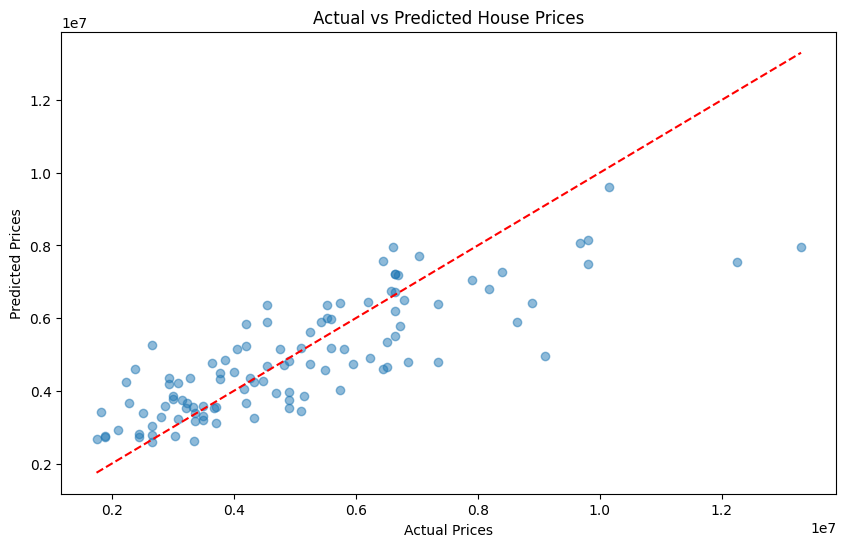

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

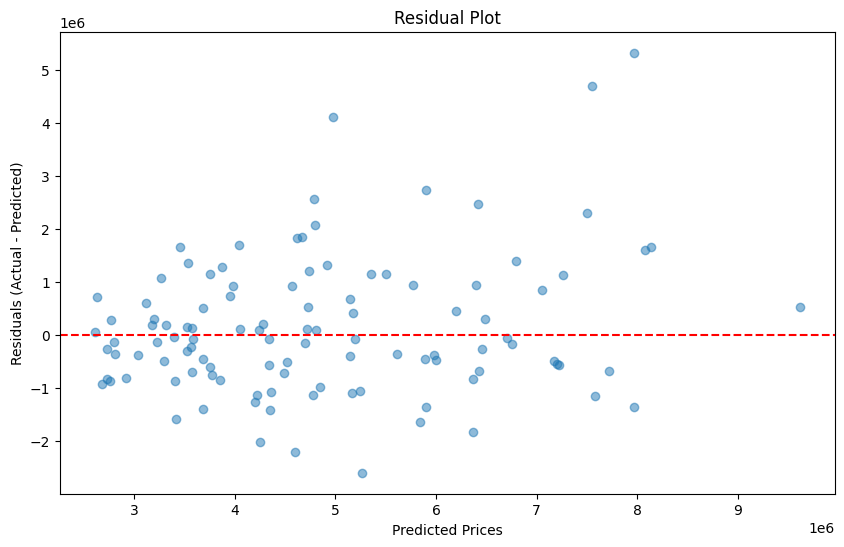

In [24]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

In [25]:
# Create a DataFrame of coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
})

# Sort by absolute coefficient value (most impactful features)
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print("Feature Importance (Sorted by Impact on Price):")
print(coef_df[['Feature', 'Coefficient']].to_string(index=False))

Feature Importance (Sorted by Impact on Price):
                        Feature    Coefficient
            airconditioning_yes  791426.735843
            hotwaterheating_yes  684649.885339
                   prefarea_yes  629890.565313
                      bathrooms  549420.501241
                           area  511615.563777
   furnishingstatus_unfurnished -413645.062228
                   basement_yes  390251.176181
                   mainroad_yes  367919.947680
                        stories  353158.429856
                  guestroom_yes  231610.037176
                        parking  193542.781675
furnishingstatus_semi-furnished -126881.817585
                       bedrooms   56615.572458


In [26]:
# Standardize coefficients by multiplying by (feature std / target std)
std_coef = model.coef_ * (X.std() / y.std())
coef_df['Standardized_Coefficient'] = std_coef

print("\nStandardized Coefficients (Comparable Across Features):")
print(coef_df[['Feature', 'Standardized_Coefficient']].sort_values(
    'Standardized_Coefficient',
    ascending=False
).to_string(index=False))


Standardized Coefficients (Comparable Across Features):
                        Feature  Standardized_Coefficient
            airconditioning_yes                       NaN
            hotwaterheating_yes                       NaN
                   prefarea_yes                       NaN
                      bathrooms                       NaN
                           area                       NaN
   furnishingstatus_unfurnished                       NaN
                   basement_yes                       NaN
                   mainroad_yes                       NaN
                        stories                       NaN
                  guestroom_yes                       NaN
                        parking                       NaN
furnishingstatus_semi-furnished                       NaN
                       bedrooms                       NaN
